# KNN 

**k-NN** é uma algoritmo que pertence a classe de aprendizado baseado em instância. O k-NN é usado para o reconhecimento de padrões, buscando os vizinhos mais próximos dado uma distância, visto que usa a hipotese que dados similares tendem a estar na mesma região. **É um problema de otimização que busca encontrar pontos em uma determinada vizinhancia** </p> 
<p> A Classe : 
Instace based learning é a classe que compara as novas instâncias com de um problema com as instâncias vistas no treinamento. Ou seja, ao invés de usar de generalização ele controí hipotese diretamente com as instâncias de treinamento.</p> 
<p> A Vantagem: 
Capacidade de se adaptar o modelos a dados que não foram vistos antes. </p>

Para entender melhor o funcionamento do algoritmo vamos relembrar de alguns conceitos matemático, sendo esse conceitos a *distância euclidiana*, *a distância city-block, ou Manhattan* e a *distância de Minkowski*. Vale lembrar que as distâncias podem ser entendidas como medidas de similaridade, defini o grau de semelhança entre as instâncias e agrupa de acordo com a coesão, e desimilaridade, é a diferença entre as instâncias. Sendo p=(p1, p2, ..., pn) e q=(q1, q2, ..., qn):

- Distância euclidiana: Distância entre dois pontos num espaço Euclidiano. É definida como a soma da raiz quadrada da diferença entre duas coordenadas, em suas dimensões.

![Distância Euclidiana](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT7VfwGAEGxDElBVnXKYFWirzdnYf8UXZHcNvUiKW3-Hic83oTF)

Para entender melhor sobre a distância eucliana veja: https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana

- Distância Manhattan: Distancia entre dois pontos no espaço cartesiano. É definida como sendo a soma da diferença entre as coordenadas em cada dimensão. 

![image.png](https://angiogenesis.dkfz.de/oncoexpress/software/cs_clust/dist_004.gif)

Para entender melhor sobre distância de Manhattan veja: https://pt.wikipedia.org/wiki/Geometria_pombalina

- Distância de Minkowski: É uma métrica do espaço vetorial. Pode ser visto como sendo uma generalização das duas distâncias anteriores.

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTr3HJ2kifDA1jQQifa9yHpi6DG5rRRq8oVyMxQH3g3MQjPrq31)

Para entender melhor sobre distância de Minkowski veja: https://en.wikipedia.org/wiki/Minkowski_distance

Na literatura, existem duas regras de classificação, *maioria da votação* e *peso pela distância*, sendo a primeira todos com a mesma influêcia e a classe escolhida é aquela que possui mais representante na vizinhança e a segunda cada vizinho tem um peso inversamente proporcional a distância. 

Para executar o algoritmo, precisa-se de um conjunto de treinamento, definição de uma métrica, usada pra calcular a distância entre os exemplos e definir um valor da quantidade de vizinho:

Sendo assim, para executar o algoritmo temos que:
1.	Fixar o ponto que será analisado, esse ponto é chamado de centroide.
2.	Calcular a distância.
3.	Encontrar os k-vizinhos mais próximos.
4.	Predizer o rótulo do ponto analisado (centroide). 

A imagem abaixo, representa como o algoritmo funciona

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTmeZsoI8ubW3Lt9Ff11Z7E9Q4cnur9mcOwkm5s3bkXfCdlt_3b)

Para exemplificar o algoritmo usaremos o *Iris flower dataset*, uma conjunto de dados da flor de Iris. 

## Exemplo 

**Iris flower dataset**: é um conjunto de dados introduzidos em 1936 pelo estatistico e biologo britânico Ronald Fisher. Em que  Edgar Anderson, coletou os dados para quantificar a variação morfológica da flor de Iris de três especies relacionadas, sendo as especies *Iris setosa , versicolor e virginica*. **O conjunto fornece as medidas em centímetros da altura e da largura das sépalas e das pétalas, para 50 flores de cada especie**. Oferecido pelo repositório [UCI](https://archive.ics.uci.edu/ml/datasets/iris).

![imagem](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSfRJzytu3Xe6hHk7EYDnUbmndgdndJmY04idaGfffomJXkyASM)

Para melhor compreensão do funcionamento lógico do algoritmo, iremos seguir alguns passos práticos:
- Fase 1: Obtenção do conjunto de dados.
- Fase 2: Leitura dos dados.
- Fase 3: Criação da funcão que calcula a distância entre os dados.
- Fase 4: Criação da k-NN
- Fase 5: Aplicando pontos de treinamento

In [1]:
import pandas as pd
import numpy as np
import math
import operator

### Fase 1: 

 Para obter o conjunto de dados, usamos o repositório da [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/). Para esse exemplo precisaremos baixar o arquivo iris.data.

### Fase 2:

O código abaixo lê o arquivo e verifica a distribuição dos dados.

In [20]:
col=['sepal_length','sepal_width','petal_length','petal_width','type']
iris=pd.read_csv("iris.data",names=col)

In [21]:
print("5 primeiras linhas")
print(iris.head())
print("*********")
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type")
print(iris['type'].value_counts())
print("*********")
print(iris.describe())

5 primeiras linhas
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
*********
columns Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: type, dtype: int64
*********
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000 

## Fase 3: 

Definição da função que calcula a distância, escolheu-se a distância euclidiana:

In [22]:
def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
       
    return np.sqrt(distance)

## Fase 4: 

In [27]:
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    print(length)
    
    
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
       
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
       
 
    
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) #by using it we store indices also
    sorted_d1 = sorted(distances.items())
    print(sorted_d[:5])
    print(sorted_d1[:5])
   
 
    neighbors = []
    
    
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
        counts = {"Iris-setosa":0,"Iris-versicolor":0,"Iris-virginica":0}
    
    
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
  
    print(counts)
    sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    print(sortedVotes)
    return(sortedVotes[0][0], neighbors)

## Fase 5:

In [37]:
testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
result,neigh = knn(iris, test, 4)#here we gave k=4
print("And the flower is:",result)
print("the neighbors are:",neigh)

4
[(57, 3.706750598570128), (8, 3.8065732621348567), (42, 3.817066936798463), (93, 3.8340579025361627), (38, 3.8431757701151272)]
[(0, 4.32434966208793), (1, 4.196427051671457), (2, 4.057092555020159), (3, 3.8858718455450894), (4, 4.237924020083418)]
{'Iris-setosa': 2, 'Iris-versicolor': 2, 'Iris-virginica': 0}
[('Iris-setosa', 2), ('Iris-versicolor', 2), ('Iris-virginica', 0)]
And the flower is: Iris-setosa
the neighbors are: [57, 8, 42, 93]


### k-NN usando função embutida
Outra forma de aplicar o k-NN é usando funções embutidas, ou seja, basta passar o dados para o método do scikit learn. Para isso, temos que:

- Passo 1: Importar a biblioteca.
- Passo 2: Dividindo os dados.
- Passo 3: Treinando o modelo.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
x = iris.iloc [:,: 4] #all parâmetros 
y = iris ["type"] #class labels

In [47]:
neigh=KNeighborsClassifier(n_neighbors=4)
neigh.fit(iris.iloc[:,:4],iris["type"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [49]:
testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:",neigh.predict(test))
print("neighbors",neigh.kneighbors(test))

     0    1    2    3
0  1.4  3.6  3.4  1.2
predicted: ['Iris-setosa']
neighbors (array([[3.7067506 , 3.80657326, 3.81706694, 3.8340579 ]]), array([[57,  8, 42, 93]], dtype=int64))


### k-NN usando dividindo os dados em treinamento e teste:

In [50]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #to remove unwanted warnings

Separando os dados em treinamento e teste:

In [51]:
x=iris.iloc[1:,:3]#features
y=iris.iloc[1:,4:]#class labels
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#test_size determines the percentage of test data you want here
#train=80% and test=20% data is randomly split

### Encontrando o melhohr k, usando a **força bruta**:

In [53]:
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 13 using brute is 93.33333333333333


In [54]:
print("classification_report using brute force")
print(classification_report(y_test,pred))

classification_report using brute force
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Faremos uma análise de calor para descobrir qual porcentagem está correta se comparado com o rótulo real.

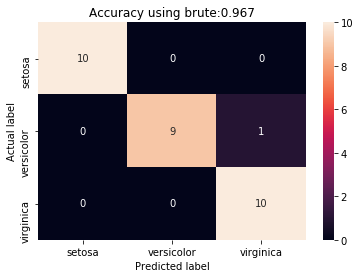

In [55]:
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Usando kd-tree:

In [56]:
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'kd_tree')
    
    cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'kd_tree')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using kd-tree is {1}".format(optimal_n,acc))

The accuracy for optimal k = 13 using kd-tree is 93.33333333333333


In [57]:
print("classification_report using kd-tree")
print(classification_report(y_test,pred))

classification_report using kd-tree
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Analise de calor:

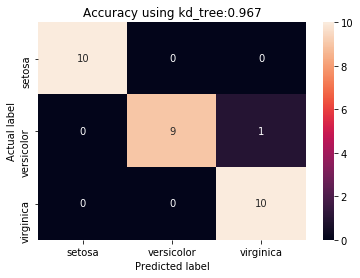

In [58]:
clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using kd_tree:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Podemos notar que conseguimos o mesmo mapa de calor nos dois casos. 